In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Amazon_Unlocked_Mobile.csv")

In [3]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [4]:
df.shape

(413840, 6)

In [5]:
print("Summary statistics of numerical features : \n", df.describe())

print("\nTotal number of reviews: ",len(df))
print("\nTotal number of brands: ", len(list(set(df['Brand Name']))))
print("\nTotal number of unique products: ", len(list(set(df['Product Name']))))

print("\nPercentage of reviews with neutral sentiment : {:.2f}%"\
      .format(df[df['Rating']==3]["Reviews"].count()/len(df)*100))
print("\nPercentage of reviews with positive sentiment : {:.2f}%"\
      .format(df[df['Rating']>3]["Reviews"].count()/len(df)*100))
print("\nPercentage of reviews with negative sentiment : {:.2f}%"\
      .format(df[df['Rating']<3]["Reviews"].count()/len(df)*100))

Summary statistics of numerical features : 
                Price         Rating   Review Votes
count  407907.000000  413840.000000  401544.000000
mean      226.867155       3.819578       1.507237
std       273.006259       1.548216       9.163853
min         1.730000       1.000000       0.000000
25%        79.990000       3.000000       0.000000
50%       144.710000       5.000000       0.000000
75%       269.990000       5.000000       1.000000
max      2598.000000       5.000000     645.000000

Total number of reviews:  413840

Total number of brands:  385

Total number of unique products:  4410

Percentage of reviews with neutral sentiment : 7.68%

Percentage of reviews with positive sentiment : 68.86%

Percentage of reviews with negative sentiment : 23.45%


<AxesSubplot:>

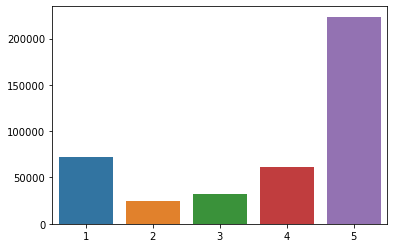

In [6]:
sns.barplot(x=df.Rating.value_counts().index,y=df.Rating.value_counts().values)

In [7]:
df.dropna(inplace=True)
df = df[df['Rating'] != 3]
df['Sentiment'] = np.where(df['Rating'] > 3, 1, 0)
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1


<AxesSubplot:>

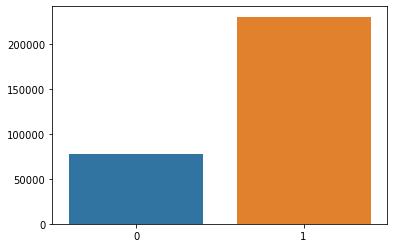

In [8]:
sns.barplot(x=df.Sentiment.value_counts().index,y=df.Sentiment.value_counts().values)

In [9]:
df.shape

(308277, 7)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['Sentiment'],test_size=0.25, random_state=0)
                                                    
print('Number of Training examples\n', X_train.shape[0])
print('Number of Testing Examples\n', X_test.shape[0])
print('Review Example \n', X_train.iloc[0])


Number of Training examples
 231207
Number of Testing Examples
 77070
Review Example 
 I bought a BB Black and was deliveried a White BB.Really is not a serious provider...Next time is better to cancel the order.


In [11]:
X_test.shape

(77070,)

In [12]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'html.parser').get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    words = letters_only.lower().split() 
    
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True:

        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:
        return (words)
    
    return( " ".join(words))

In [13]:
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag
from bs4 import BeautifulSoup 
import logging
from wordcloud import WordCloud
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Cleaned review in the training set : \n',  X_train_cleaned[15])
    
for d in X_test:
    X_test_cleaned.append(cleanText(d))
print('Cleaned review in the training set : \n',  X_test_cleaned[15])

Cleaned review in the training set : 
 love the color and the polka dot design the navy blue is what is pictured dark blue the polka dot design is not a film it is part of the backing it is not a fake otter box like a couple of reviews i read it came in its original packing it was a bit bulky at first but i got use to it it has three pieces the holster plastic casing with clear screen protector and rubber casing fyi clean your screen really well before putting on the plastic casing and make sure there is no lint on your screen or the clear screen protector seems like i will be taking it out of the case to clean the screen over time somehow lint and dust get in it otherwise just love the case and i feel like it will protect my phone knock on wood i haven t dropped my phone yet great price too best buy target walmart sell otter box cases for tax
Cleaned review in the training set : 
 it was exactly what i d hoped for and it came in good time


# Multinomial NB

In [14]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

#CountVectorizer
countVect = CountVectorizer() 
X_train_countVect = countVect.fit_transform(X_train_cleaned)

#TfidfVectorizer
tfidfvectcount = TfidfVectorizer(min_df=5)
X_train_tfidfvectcount = tfidfvectcount.fit_transform(X_train_cleaned)



print("Number of features with countvectorizer : %d \n" %len(countVect.get_feature_names()))
print("Number of features with tfidfvectorizer : %d \n" %len(tfidfvectcount.get_feature_names()))
#print("Show some feature names : \n", countVect.get_feature_names()[::100])

mnb = MultinomialNB()
mnb.fit(X_train_countVect, y_train)

mnb1 = MultinomialNB()
mnb1.fit(X_train_tfidfvectcount,y_train)

Number of features with countvectorizer : 47469 

Number of features with tfidfvectorizer : 16710 



MultinomialNB()


Accuracy on test set: 0.9262

Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85     19500
           1       0.94      0.96      0.95     57570

    accuracy                           0.93     77070
   macro avg       0.91      0.90      0.90     77070
weighted avg       0.93      0.93      0.93     77070


Confusion Matrix : 
 [[16226  3274]
 [ 2413 55157]]


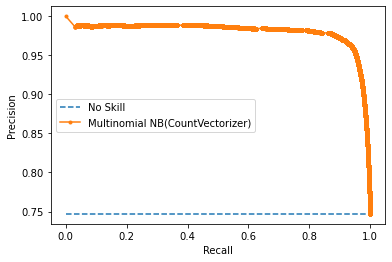

Multinomial NB(CountVectorizer) AUC score : 0.9576
Multinomial NB(CountVectorizer) PR AUC    : 0.980


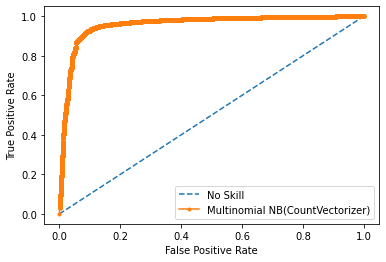

In [15]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score,roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

comparepredictions=dict()
compareAUC=dict()
predictions = mnb.predict(countVect.transform(X_test_cleaned))
print ("\nAccuracy on test set: {:.4f}".format(accuracy_score(y_test, predictions)))
#print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))
comparepredictions['MultinomialNBCV'] = accuracy_score(y_test, predictions)
#compareAUC['MultinomialNBCV'] = roc_auc_score(y_test, predictions)

yhat = mnb.predict_proba(countVect.transform(X_test_cleaned))
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]

# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test==1]) / len(y_test)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Multinomial NB(CountVectorizer)')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

print("Multinomial NB(CountVectorizer) AUC score : {:.4f}".format(roc_auc_score(y_test, pos_probs)))
roc_auc = roc_auc_score(y_test, pos_probs)
#print(roc_auc)

auc_score = auc(recall, precision)
print('Multinomial NB(CountVectorizer) PR AUC    : %.3f' % auc_score)

compareAUC['MultinomialNBcount'] = roc_auc


# ************************AUC curve code *************************


ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = mnb.predict_proba(countVect.transform(X_test_cleaned))
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Multinomial NB(CountVectorizer)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


Accuracy on test set: 0.9164

Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.75      0.82     19500
           1       0.92      0.97      0.95     57570

    accuracy                           0.92     77070
   macro avg       0.91      0.86      0.88     77070
weighted avg       0.92      0.92      0.91     77070


Confusion Matrix : 
 [[14556  4944]
 [ 1501 56069]]


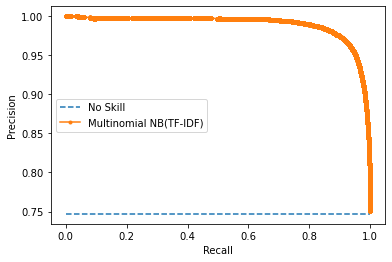

Multinomial NB(TF-IDF) AUC score : 0.9711
Multinomial NB(TF-IDF) PR AUC    : 0.989


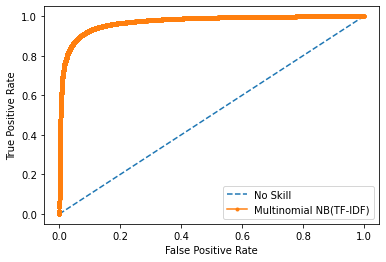

In [16]:
predictions11 = mnb1.predict(tfidfvectcount.transform(X_test_cleaned))
print ("\nAccuracy on test set: {:.4f}".format(accuracy_score(y_test, predictions11)))
#print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions11)))
print("\nClassification report : \n", metrics.classification_report(y_test, predictions11))
print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions11))
comparepredictions['MultinomialNBtfidf'] = accuracy_score(y_test, predictions11)
#compareAUC['MultinomialNBtfidf'] = roc_auc_score(y_test, predictions11)


yhat1 = mnb1.predict_proba(tfidfvectcount.transform(X_test_cleaned))
# retrieve just the probabilities for the positive class
pos_probs1 = yhat1[:, 1]
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test==1]) / len(y_test)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision1, recall1, _ = precision_recall_curve(y_test, pos_probs1)
# plot the model precision-recall curve
plt.plot(recall1, precision1, marker='.', label='Multinomial NB(TF-IDF)')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

print("Multinomial NB(TF-IDF) AUC score : {:.4f}".format(roc_auc_score(y_test, pos_probs1)))
roc_auc_1 = roc_auc_score(y_test, pos_probs1)
#print(roc_auc)

auc_score_1 = auc(recall1, precision1)
print('Multinomial NB(TF-IDF) PR AUC    : %.3f' % auc_score_1)

compareAUC['MultinomialNBtfidf'] = roc_auc_1



# ************************AUC curve code *************************


ns_probs1 = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs1 = mnb1.predict_proba(tfidfvectcount.transform(X_test_cleaned))
# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
# calculate scores
ns_auc1 = roc_auc_score(y_test, ns_probs1)
lr_auc1 = roc_auc_score(y_test, lr_probs1)
# summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs1)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs1)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Multinomial NB(TF-IDF)')
# axis labels
# pyplot.title('COPD Detection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [17]:
import pickle
pickle.dump(countVect,open('countVect.pkl','wb'))
pickle.dump(tfidfvectcount,open('tfidfvectcount.pkl','wb'))
pickle.dump(mnb1,open('Naive_Bayes_model.pkl','wb'))

# Logistic Regression

In [18]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) 

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

Number of features : 17951 



LogisticRegression()

In [19]:
feature_names = np.array(tfidf.get_feature_names())
sorted_coef_index = lr.coef_[0].argsort()
print('\nTop 10 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Top 10 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))


Top 10 features with smallest coefficients :
['not' 'worst' 'useless' 'disappointed' 'terrible' 'return' 'waste' 'poor'
 'horrible' 'doesn']

Top 10 features with largest coefficients : 
['love' 'great' 'excellent' 'perfect' 'amazing' 'awesome' 'perfectly'
 'easy' 'best' 'loves']


In [20]:
predictions1 = lr.predict(tfidf.transform(X_test_cleaned))
print ("\nAccuracy on test set: {:.4f}".format(accuracy_score(y_test, predictions1)))
print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions1)))
print("\nClassification report : \n", metrics.classification_report(y_test, predictions1))
print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions1))
comparepredictions['LogisticRegression'] = accuracy_score(y_test, predictions1)
compareAUC['LogisticRegression'] = roc_auc_score(y_test, predictions1)




Accuracy on test set: 0.9481

AUC score : 0.9254

Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.88      0.90     19500
           1       0.96      0.97      0.97     57570

    accuracy                           0.95     77070
   macro avg       0.94      0.93      0.93     77070
weighted avg       0.95      0.95      0.95     77070


Confusion Matrix : 
 [[17147  2353]
 [ 1645 55925]]


The best paramenter set is : 
 {'lr__C': 10, 'tfidf__max_features': None, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}

Accuracy on validation set: 0.9800

Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96     19500
           1       0.98      0.99      0.99     57570

    accuracy                           0.98     77070
   macro avg       0.98      0.97      0.97     77070
weighted avg       0.98      0.98      0.98     77070


Confusion Matrix : 
 [[18615   885]
 [  660 56910]]


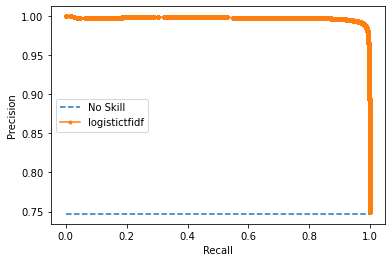

logistic NB(TF-IDF) AUC score : 0.9939
logistic NB(TF-IDF) PR AUC    : 0.997


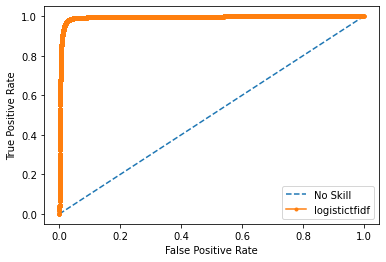

In [21]:
from sklearn.model_selection import  GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
estimators = [("tfidf", TfidfVectorizer()), ("lr", LogisticRegression())]
model = Pipeline(estimators)


params = {"lr__C":[0.1, 1, 10], 
          "tfidf__min_df": [1, 3], 
          "tfidf__max_features": [1000, None], 
          "tfidf__ngram_range": [(1,1), (1,2)], 
          "tfidf__stop_words": [None, "english"]} 

grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", n_jobs=-1)
grid.fit(X_train_cleaned, y_train)
print("The best paramenter set is : \n", grid.best_params_)

predictions2 = grid.predict(X_test_cleaned)
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions2)))
#print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions2)))
print("\nClassification report : \n", metrics.classification_report(y_test, predictions2))
print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions2))
comparepredictions['best_grid_logistic']=accuracy_score(y_test, predictions2)
#compareAUC['best_grid_logistic'] = roc_auc_score(y_test, predictions2)


yhat1 = grid.predict_proba(X_test_cleaned)
# retrieve just the probabilities for the positive class
pos_probs1 = yhat1[:, 1]
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test==1]) / len(y_test)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision1, recall1, _ = precision_recall_curve(y_test, pos_probs1)
# plot the model precision-recall curve
plt.plot(recall1, precision1, marker='.', label='logistictfidf')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

print("logistic NB(TF-IDF) AUC score : {:.4f}".format(roc_auc_score(y_test, pos_probs1)))
roc_auc_1 = roc_auc_score(y_test, pos_probs1)
#print(roc_auc)

auc_score_1 = auc(recall1, precision1)
print('logistic NB(TF-IDF) PR AUC    : %.3f' % auc_score_1)

compareAUC['best_grid_logistic'] = roc_auc_1

# ************************AUC curve code *************************

ns_probs1 = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs1 = grid.predict_proba(X_test_cleaned)
# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
# calculate scores
ns_auc1 = roc_auc_score(y_test, ns_probs1)
lr_auc1 = roc_auc_score(y_test, lr_probs1)
# summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs1)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs1)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='logistictfidf')
# axis labels
# pyplot.title('COPD Detection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


In [22]:
import pickle
pickle.dump(grid.best_estimator_,open('LogisticModel.pkl','wb'))

In [23]:
import nltk
nltk.download('punkt')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):

    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences

sentences = []
for review in X_train_cleaned:
    sentences += parseSent(review, tokenizer,remove_stopwords=False)
    
print('%d parsed sentence in the training set\n'  %len(sentences))
print('Show a parsed sentence in the training set : \n',  sentences[25])

[nltk_data] Downloading package punkt to /home/pranith/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


230907 parsed sentence in the training set

Show a parsed sentence in the training set : 
 ['it', 's', 'like', 'new', 'and', 'works', 'so', 'well']


In [24]:
num_features = 350                    
min_word_count = 10                
num_workers = 4       
context = 10                                                                                          
downsampling = 1e-3 

print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count = min_word_count,\
                 window = context, sample = downsampling)
w2v.init_sims(replace=True)
w2v.save("w2v_350")

print("Number of words in the vocabulary list : %d \n" %len(w2v.wv.index_to_key))
print("Show first 10 words in the vocalbulary list  vocabulary list: \n", w2v.wv.index_to_key[0:10])

Training Word2Vec model ...

Number of words in the vocabulary list : 11587 

Show first 10 words in the vocalbulary list  vocabulary list: 
 ['the', 'i', 'it', 'and', 'phone', 'a', 'to', 'is', 'this', 'for']


# LSTM

In [25]:
import tensorflow
tensorflow.__version__

'2.3.1'

In [26]:
import keras
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K
from keras.layers.embeddings import Embedding

In [27]:
top_words = 20000 
maxlen = 100 
batch_size = 32
nb_classes = 2
nb_epoch = 3


# Vectorize X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words) #only consider top 20000 words in the corpse
tokenizer.fit_on_texts(X_train)
# tokenizer.word_index #access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_seq = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = sequence.pad_sequences(sequences_test, maxlen=maxlen)


# one-hot encoding of y_train and y_test
y_train_seq = np_utils.to_categorical(y_train, nb_classes)
y_test_seq = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq.shape)
print('X_test shape:', X_test_seq.shape)
print('y_train shape:', y_train_seq.shape)
print('y_test shape:', y_test_seq.shape)

X_train shape: (231207, 100)
X_test shape: (77070, 100)
y_train shape: (231207, 2)
y_test shape: (77070, 2)


In [28]:
lstm1 = Sequential()
lstm1.add(Embedding(top_words, 128))
lstm1.add(Dropout(0.2))
lstm1.add(LSTM(128,))
#lstm1.add(dropout_W=0.2)
#lstm1.add(dropout_U=0.2)  #recurrent_dropout
lstm1.recurrent_dropout=0.2
lstm1.add(Dense(nb_classes))
lstm1.add(Activation('softmax'))
lstm1.summary()

# Compile LSTM
lstm1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

lstm1.fit(X_train_seq, y_train_seq, batch_size=batch_size, epochs=nb_epoch, verbose=1)

# Model evluation
score = lstm1.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))
comparepredictions['lstm1']=score[1]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
dropout (Dropout)            (None, None, 128)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 2)                 258       
_________________________________________________________________
activation (Activation)      (None, 2)                 0         
Total params: 2,691,842
Trainable params: 2,691,842
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
7226/7226 [==============================] - 608s 84ms/step - loss: 0.1487 - accuracy: 0.9449
Epoch 2/

In [29]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print("Model LSTM Classification report")
lstm1Prediction = lstm1.predict_classes(X_test_seq)
#print(lstm1.summary())
rounded_labels=np.argmax(y_test_seq, axis=1)
print('\n*Classification LSTM \n', classification_report(rounded_labels, lstm1Prediction))


Model LSTM Classification report
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

*Classification LSTM 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     19500
           1       0.98      0.98      0.98     57570

    accuracy                           0.97     77070
   macro avg       0.96      0.96      0.96     77070
weighted avg       0.97      0.97      0.97     77070



Instructions for updating:
Please use `model.predict()` instead.


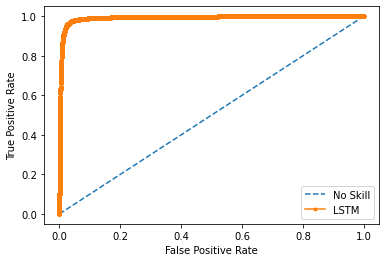

In [30]:
ms_probs1 = [0 for _ in range(len(y_test))]

# predict probabilities
lstm_probs1 = lstm1.predict_proba(X_test_seq)
# keep probabilities for the positive outcome only
lstm_probs1 = lstm_probs1[:, 1]
# calculate scores
ms_auc1 = roc_auc_score(y_test, ms_probs1)
lstm_auc1 = roc_auc_score(y_test, lstm_probs1)
compareAUC['lstm1'] = lstm_auc1
# summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ms_fpr, ms_tpr, _ = roc_curve(y_test, ms_probs1)
lstm_fpr, lstm_tpr, _ = roc_curve(y_test, lstm_probs1)
# plot the roc curve for the model
plt.plot(ms_fpr, ms_tpr, linestyle='--', label='No Skill')
plt.plot(lstm_fpr, lstm_tpr, marker='.', label='LSTM')
# axis labels
# pyplot.title('COPD Detection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

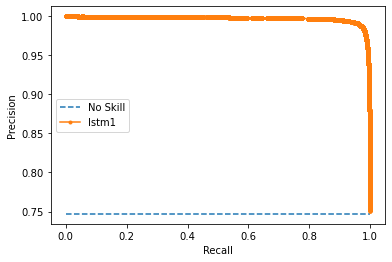


AUC score : 0.9919
LSTM PR AUC: 0.997


In [31]:
from sklearn.metrics import precision_recall_curve
yhat4 = lstm1.predict_proba(X_test_seq)
# retrieve just the probabilities for the positive class
pos_probs4 = yhat4[:, 1]
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test==1]) / len(y_test)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision4, recall4, _ = precision_recall_curve(y_test, pos_probs4)
# plot the model precision-recall curve
plt.plot(recall4, precision4, marker='.', label='lstm1')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, pos_probs4)))
roc_auc = roc_auc_score(y_test, pos_probs4)
#print(roc_auc)

auc_score = auc(recall4, precision4)
print('LSTM PR AUC: %.3f' % auc_score)



In [32]:
lstm1.layers[0].get_weights()[0]
print("Size of weight matrix in the embedding layer : ", lstm1.layers[0].get_weights()[0].shape)
# get weight matrix of the hidden layer
print("Size of weight matrix in the hidden layer : ", lstm1.layers[2].get_weights()[0].shape)      
# get weight matrix of the output layer
print("Size of weight matrix in the output layer : ", lstm1.layers[3].get_weights()[0].shape)

Size of weight matrix in the embedding layer :  (20000, 128)
Size of weight matrix in the hidden layer :  (128, 512)
Size of weight matrix in the output layer :  (128, 2)


In [33]:
model_yaml = lstm1.to_yaml()
with open("lstm1.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
lstm1.save_weights("lstm1.h5")
#print("Saved model to disk")

In [34]:
import tensorflow
yaml_file = open('lstm1.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = tensorflow.keras.models.model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("lstm1.h5")

# LSTM with Word2Vec Embedding

In [35]:
w2v = Word2Vec.load("w2v_350")
embedding_matrix = w2v.wv.vectors
print("Shape of embedding matrix : ", embedding_matrix.shape)

Shape of embedding matrix :  (11587, 350)


In [36]:
top_words = embedding_matrix.shape[0] 
maxlen = 100 
batch_size = 32
nb_classes = 2
nb_epoch = 3


# Vectorize X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words) #only consider top 20000 words in the corpse
tokenizer.fit_on_texts(X_train)
# tokenizer.word_index #access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_seq = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = sequence.pad_sequences(sequences_test, maxlen=maxlen)


# one-hot encoding of y_train and y_test
y_train_seq = np_utils.to_categorical(y_train, nb_classes)
y_test_seq = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq.shape)
print('X_test shape:', X_test_seq.shape)
print('y_train shape:', y_train_seq.shape)
print('y_test shape:', y_test_seq.shape)

X_train shape: (231207, 100)
X_test shape: (77070, 100)
y_train shape: (231207, 2)
y_test shape: (77070, 2)


In [37]:
pickle.dump(tokenizer,open('tokenizer.pkl','wb'))

In [38]:
embedding_layer = Embedding(embedding_matrix.shape[0], 
                            embedding_matrix.shape[1],
                            weights=[embedding_matrix])

lstm2 = Sequential()
lstm2.add(embedding_layer)
lstm2.add(Dropout(0.2))
lstm2.add(LSTM(128))
#lstm2.recurrent_dropout=0.2
lstm2.add(Dense(nb_classes))
lstm2.add(Activation('softmax'))
lstm2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 350)         4055450   
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 350)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               245248    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 4,300,956
Trainable params: 4,300,956
Non-trainable params: 0
_________________________________________________________________


In [39]:
lstm2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
lstm2.fit(X_train_seq, y_train_seq, batch_size=batch_size, epochs=nb_epoch, verbose=1)


Epoch 1/3
7226/7226 [==============================] - 828s 115ms/step - loss: 0.1450 - accuracy: 0.9461
Epoch 2/3
7226/7226 [==============================] - 820s 113ms/step - loss: 0.0810 - accuracy: 0.9730
Epoch 3/3
7226/7226 [==============================] - 820s 113ms/step - loss: 0.0555 - accuracy: 0.9827


In [40]:
score1 = lstm2.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score1[0]))
print('Test accuracy : {:.4f}'.format(score1[1]))
comparepredictions['lstm2']=score1[1]

2409/2409 [==============================] - 66s 27ms/step - loss: 0.0871 - accuracy: 0.9741
Test loss : 0.0871
Test accuracy : 0.9741


# LSTM Word2Vec Embedding with Dropout Layer 

In [41]:
embedding_layer = Embedding(embedding_matrix.shape[0], 
                            embedding_matrix.shape[1],
                            weights=[embedding_matrix])

lstm2 = Sequential()
lstm2.add(embedding_layer)
lstm2.add(Dropout(0.2))
lstm2.add(LSTM(128))
lstm2.recurrent_dropout=0.2
lstm2.add(Dense(nb_classes))
lstm2.add(Activation('softmax'))
lstm2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 350)         4055450   
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 350)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               245248    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 4,300,956
Trainable params: 4,300,956
Non-trainable params: 0
_________________________________________________________________


In [42]:
lstm2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
lstm2.fit(X_train_seq, y_train_seq, batch_size=batch_size, epochs=nb_epoch, verbose=1)

Epoch 1/3
7226/7226 [==============================] - 826s 114ms/step - loss: 0.1462 - accuracy: 0.9456
Epoch 2/3
7226/7226 [==============================] - 819s 113ms/step - loss: 0.0821 - accuracy: 0.9723
Epoch 3/3
7226/7226 [==============================] - 818s 113ms/step - loss: 0.0561 - accuracy: 0.9821


In [43]:
score1 = lstm2.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score1[0]))
print('Test accuracy : {:.4f}'.format(score1[1]))
comparepredictions['lstm2']=score1[1]

2409/2409 [==============================] - 65s 27ms/step - loss: 0.0875 - accuracy: 0.9728
Test loss : 0.0875
Test accuracy : 0.9728


In [44]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print("Model LSTM Classification report")
lstm2Prediction = lstm2.predict_classes(X_test_seq)
#print(lstm2.summary())
rounded_labels2=np.argmax(y_test_seq, axis=1)
print('\n*Classification LSTM \n', classification_report(rounded_labels2, lstm2Prediction))

Model LSTM Classification report

*Classification LSTM 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     19500
           1       0.98      0.98      0.98     57570

    accuracy                           0.97     77070
   macro avg       0.96      0.96      0.96     77070
weighted avg       0.97      0.97      0.97     77070



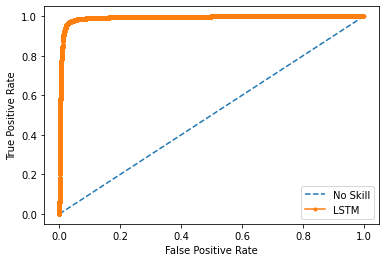

In [45]:
ms_probs2 = [0 for _ in range(len(y_test))]

# predict probabilities
lstm_probs2 = lstm2.predict_proba(X_test_seq)
# keep probabilities for the positive outcome only
lstm_probs2 = lstm_probs2[:, 1]
# calculate scores
ms_auc2 = roc_auc_score(y_test, ms_probs2)
lstm_auc2 = roc_auc_score(y_test, lstm_probs2)
# summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ms_fpr1, ms_tpr1, _ = roc_curve(y_test, ms_probs2)
lstm_fpr1, lstm_tpr1, _ = roc_curve(y_test, lstm_probs2)
# plot the roc curve for the model
plt.plot(ms_fpr1, ms_tpr1, linestyle='--', label='No Skill')
plt.plot(lstm_fpr1, lstm_tpr1, marker='.', label='LSTM')
# axis labels
# pyplot.title('COPD Detection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

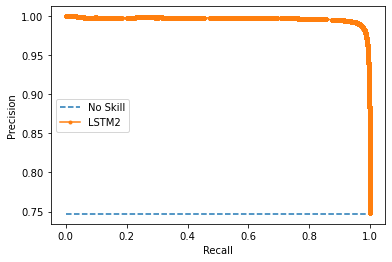


AUC score : 0.9917
LSTM PR AUC: 0.996


In [46]:
from sklearn.metrics import precision_recall_curve
yhat41 = lstm2.predict_proba(X_test_seq)
# retrieve just the probabilities for the positive class
pos_probs41 = yhat41[:, 1]
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test==1]) / len(y_test)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision41, recall41, _ = precision_recall_curve(y_test, pos_probs41)
# plot the model precision-recall curve
plt.plot(recall41, precision41, marker='.', label='LSTM2')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, pos_probs41)))
roc_auc = roc_auc_score(y_test, pos_probs41)
#print(roc_auc)

auc_score = auc(recall41, precision41)
print('LSTM PR AUC: %.3f' % auc_score)

compareAUC['lstm2'] = roc_auc

In [47]:
print("Size of weight matrix in the embedding layer : ", lstm2.layers[0].get_weights()[0].shape)
print("Size of weight matrix in the hidden layer : ", lstm2.layers[2].get_weights()[0].shape)
print("Size of weight matrix in the output layer : ", lstm2.layers[3].get_weights()[0].shape)

Size of weight matrix in the embedding layer :  (11587, 350)
Size of weight matrix in the hidden layer :  (350, 512)
Size of weight matrix in the output layer :  (128, 2)


In [48]:
model_yaml = lstm2.to_yaml()
with open("lstm2.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
lstm2.save_weights("lstm2.h5")
print("Saved model to disk")

Saved model to disk


In [49]:
import tensorflow
yaml_file = open('lstm2.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = tensorflow.keras.models.model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("lstm2.h5")

In [50]:
sequences_t = tokenizer.texts_to_sequences(['good'])
X_train_s = sequence.pad_sequences(sequences_t, maxlen=maxlen)
print(np.argmax(loaded_model.predict(X_train_s)))

1


# Comparisions 

In [57]:
result_table=pd.DataFrame(list(comparepredictions.items()), columns=["Model","Accuracy"])

In [60]:
result_table

,Model,Accuracy
0,MultinomialNBCV,0.926210
1,MultinomialNBtfidf,0.916375
2,LogisticRegression,0.948125
3,best_grid_logistic,0.979953
4,lstm1,0.971987
5,lstm2,0.972843


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'MultinomialNBCV'),
  Text(1, 0, 'MultinomialNBtfidf'),
  Text(2, 0, 'LogisticRegression'),
  Text(3, 0, 'best_grid_logistic'),
  Text(4, 0, 'lstm1'),
  Text(5, 0, 'lstm2')])

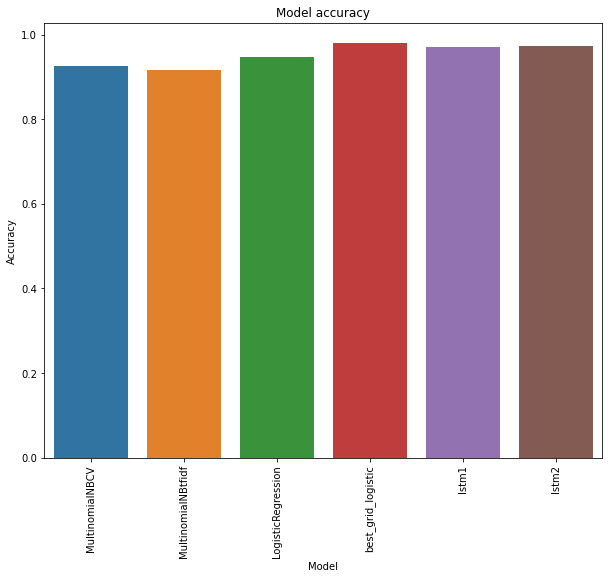

In [58]:
plt.figure(figsize= (10,8))
sns.barplot(x = "Model", y = "Accuracy", data = result_table)
plt.title("Model accuracy")
plt.xticks(rotation = 90)